In [1]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_boston
# データのロード、マージ
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

In [4]:
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values
# 学習用、検証用データに分割
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 666)

In [7]:
# 必要なライブラリのインポート
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


MSE train : 2.925, test : 13.484
MSE train : 0.968, test : 0.811


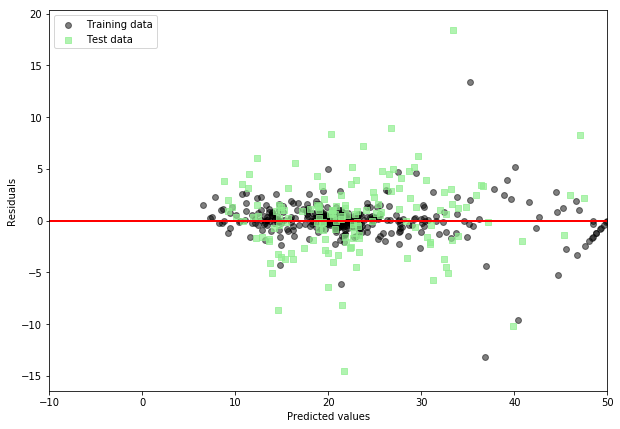

In [9]:
# matplotlibを呼び出し、あとおまじない
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()